In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from mpitree.decision_tree import DecisionTreeRegressor

In [5]:
rng = np.random.RandomState()
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

In [6]:
regr = DecisionTreeRegressor(criterion={"max_depth": 4})
regr.fit(X, y)

print(regr)

leaves = []
for n in regr:
    if n.is_leaf:
        leaves.append(n.value)

branches = []
for n in regr:
    if n.branch and n.is_leaf:
        _, b = n.branch.split(" ")
        branches.append(float(b))

print()
print(leaves)
print(branches)

┌── 0
│  ├── 0 [< 3.29]
│  │  ├── 0 [< 3.00]
│  │  │  ├── 0 [< 0.30]
│  │  │  │  └── -0.18 [< 0.05]
│  │  │  │  └── 0.16 [>= 0.05]
│  │  │  ├── 0 [>= 0.30]
│  │  │  │  └── 0.7 [< 2.94]
│  │  │  │  └── 1.4 [>= 2.94]
│  │  ├── 0 [>= 3.00]
│  │  │  ├── 0 [< 3.23]
│  │  │  │  └── 0.11 [< 3.07]
│  │  │  │  └── 0.0066 [>= 3.07]
│  │  │  └── 0.26 [>= 3.23]
│  ├── 0 [>= 3.29]
│  │  ├── 0 [< 3.77]
│  │  │  ├── 0 [< 3.62]
│  │  │  │  └── -0.34 [< 3.61]
│  │  │  │  └── 0.76 [>= 3.61]
│  │  │  └── -0.46 [>= 3.62]
│  │  ├── 0 [>= 3.77]
│  │  │  ├── 0 [< 4.20]
│  │  │  │  └── -0.75 [< 4.07]
│  │  │  │  └── -0.37 [>= 4.07]
│  │  │  ├── 0 [>= 4.20]
│  │  │  │  └── -0.95 [< 4.56]
│  │  │  │  └── -1.1 [>= 4.56]

[-0.17948899855727157, 0.1609494616870849, 0.7012981591575423, 1.374492440505983, 0.1088088831038893, 0.006586402749249984, 0.25675902743291956, -0.3409010494756013, 0.7577474733992549, -0.461466595694006, -0.7485247716719076, -0.3713877813850256, -0.9518913643192712, -1.1092954428847088]
[0.05,

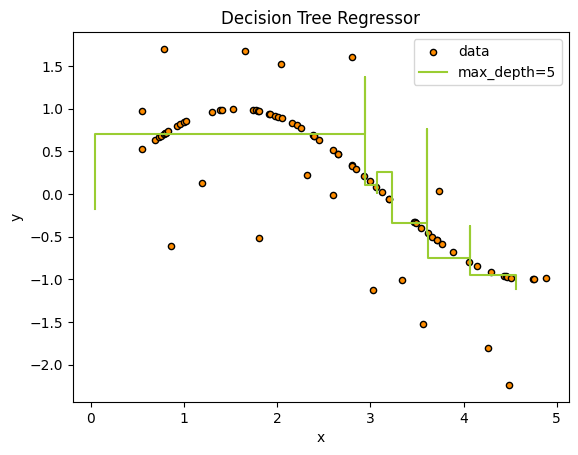

In [7]:
rng = np.random.RandomState()
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

regr = DecisionTreeRegressor(criterion={"max_depth": 5})
regr.fit(pd.DataFrame(X, columns=["x"]), pd.Series(y))

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.step(branches, leaves, where="pre", color="yellowgreen", label="max_depth=5")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Decision Tree Regressor")
plt.legend()
plt.show()